<a href="https://colab.research.google.com/github/AmadouSaw/Classification_python/blob/main/randomforests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forêts Aléatoires

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset MNIST modifié

In [14]:
from sklearn import datasets

X = pd.read_csv("/content/mnist_data.csv")
y = pd.read_csv("/content/mnist_labels.csv",dtype=int).squeeze()

MNIST est un dataset contenant 70000 images de taille 28x28 de chiffres manuscrits allant de 0 à 9. Dans ces exercices, nous allons étudier une version modifiée de ce dataset où les images ont été projetées dans un espace de faible dimension. Pour les plus curieux d'entre-vous, nous avons utilisé l'algorithme t-SNE pour obtenir cette nouvelle représentation.

#### 1. Divisez les données en un ensemble d'entraînement (la moitié des exemples) et un ensemble de test (le reste des exemples).

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

#### 2. Utilisez l'algorithme `sklearn.tree.DecisionTreeClassifier` pour apprendre un arbre de decision qui utilise le critère `gini` et qui s'arrête lorsque les feuilles de l'arbre sont pures. Calculez l'erreur d'entraînement. Comment le calcul de cette erreur vous permet-il de vérifier que toutes les feuilles de l'arbre sont pures ?

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
cross_val_score(clf, X_train, y_train)


array([0.952, 0.925, 0.929, 0.94 , 0.918])

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Calcul de l'erreur d'entraînement

In [18]:
from sklearn.metrics import zero_one_loss
print("Erreur d'entraînement      : {:.2}".format( zero_one_loss(y_train, clf.predict(X_train))))

Erreur d'entraînement      : 0.0


**le calcul de cette erreur vous permet-il de vérifier que toutes les feuilles de l'arbre sont pures car la valeur de cette erreur est nulle (0).**

#### 3. Calculez l'erreur en généralisation de votre arbre de décision. Que constatez-vous ? Est-ce surprenant ?

In [19]:
from sklearn.metrics import zero_one_loss

print("Erreur en généralisation  : {:.2}".format(zero_one_loss(y_test, clf.predict(X_test))))

Erreur en généralisation  : 0.064


**L'erreur en généralisation de l'arbre de décision est plus elevé que l'erreur d'entraînement et ce n'est pas surprenant.**

En utilisant le code suivant, il est possible de visualiser la frontière de décision d'un classifieur clf pour des données en 2 dimensions.

In [20]:
def visualize(clf,X1,X2,y):
    """ Permet de visualiser la frontière de décision du classificateur clf.
                
    Parameters
    ----------
    clf : 
        Le classificateur à visualiser
    X1 : 
        La première dimension des données
    X2 :
        La seconde dimension des données
    y :
        Les étiquettes des exemples
    
    """     
    # Plotting decision regions
    x_min, x_max = np.array(X1).min() - 1, np.array(X1).max() + 1
    y_min, y_max = np.array(X2).min() - 1, np.array(X2).max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X1, X2, c=y, s=20, edgecolor='k')

    plt.show()

#### 4. Visualisez la frontière de décision du classificateur appris en question 2.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


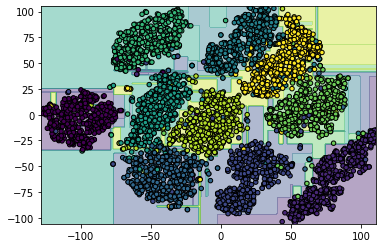

In [21]:
visualize(clf, X_train['tSNE1'], X_train['tSNE2'], y_train)

#### 5. Utilisez l'algorithme `sklearn.ensemble.RandomForestClassifier` pour apprendre un modèle de classification pour notre dataset. Utilisez 200 arbres de décision basés sur le critère `gini` et qui ne contiennent que des feuilles pures.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=200, criterion='gini')
cross_val_score(clf1, X_train, y_train)

array([0.97 , 0.949, 0.952, 0.961, 0.957])

In [23]:
clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### 6. Calculez l'erreur empirique et l'erreur en généralisation. Comparez ce résultat au résultat obtenu avec un seul arbre de décision. Que constatez-vous ?

In [24]:
from sklearn.metrics import zero_one_loss

print("Erreur empirique      : {:.2}".format( zero_one_loss(y_train, clf1.predict(X_train)))) 
print("Erreur en généralisation  : {:.2}".format(zero_one_loss(y_test, clf1.predict(X_test))))

Erreur empirique      : 0.0
Erreur en généralisation  : 0.045


Nous constatons que l'erreur empirique reste telle cependant l'erreur en généralisation diminue grandement. Le resultat est meilleur qu'avec un seul arbre de décision.

#### 7. Visualisez la frontière de décision de votre forêt aléatoire et comparez ce résultat à la frontière de décision de l'arbre de décision appris en question 2. Que constatez-vous ?

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


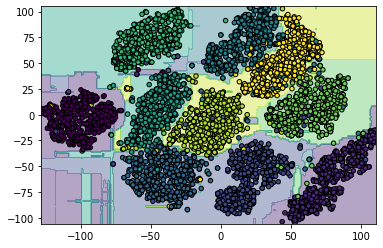

In [25]:
visualize(clf1, X_train['tSNE1'], X_train['tSNE2'], y_train)

## Dataset MNIST original

On va maintenant s'intéresser aux données MNIST originales. Le code suivant permet de les télécharger depuis le site openml.org. Cela peut prendre quelques minutes. Profitez en pour lire la description du dataset ci-dessous.

In [26]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [28]:
mnist_data = pd.DataFrame(mnist['data'])
mnist_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
mnist_target = pd.Series(mnist['target'])
mnist_target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

#### 8. Quel est le domaine des instances $\mathcal{X}$ ? Quel est l'ensemble des étiquettes $\mathcal{Y}$ ?

L'ensemble des instances est $\mathbb{R}^{784}$ et l'ensemble des étiquettes est **{0,1,2,3,4,5,6,7,8,9}**

Chaque exemple est en fait une image de 28 par 28 pixels comme illustré ci-dessous pour la première image du dataset.

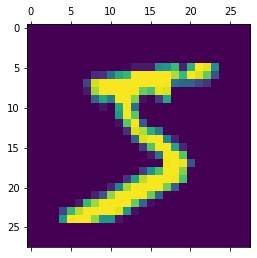

In [30]:
plt.matshow(mnist_data.loc[0].values.reshape(28,28))

#### 9. Divisez les données en un ensemble d'entraînement (60000 exemples) et un ensemble de test (le reste des exemples).

In [31]:
from sklearn.model_selection import train_test_split

Xminst_train, Xminst_test, ymnist_train, yminst_test = train_test_split(mnist_data, mnist_target, train_size=6/7)

#### 10. On veut utiliser l'algorithme des forêts aléatoires pour apprendre un modèle capable de reconnaitre les chiffres du dataset MNIST original. Sachant que l'on veut utiliser le critère `gini` et des arbres dont les feuilles sont pures, déterminez le nombre d'arbres à apprendre sans utiliser l'ensemble de test. Justifiez votre réponse.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(RandomForestClassifier(criterion='gini'), {"n_estimators":[200,250,300]},cv=3)
cv.fit(Xminst_train, ymnist_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [200, 250, 300]})

In [39]:
cv.cv_results_

{'mean_fit_time': array([64.95418048, 81.07088033, 97.76830896]),
 'std_fit_time': array([0.55925002, 0.45628083, 1.04735233]),
 'mean_score_time': array([1.92631936, 2.36472948, 2.8733445 ]),
 'std_score_time': array([0.24568936, 0.23197579, 0.14827529]),
 'param_n_estimators': masked_array(data=[200, 250, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300}],
 'split0_test_score': array([0.96845, 0.9688 , 0.969  ]),
 'split1_test_score': array([0.96735, 0.9674 , 0.9674 ]),
 'split2_test_score': array([0.96665, 0.9668 , 0.9672 ]),
 'mean_test_score': array([0.96748333, 0.96766667, 0.96786667]),
 'std_test_score': array([0.00074087, 0.00083799, 0.00080554]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

In [40]:
n_tree = RandomForestClassifier(**cv.best_params_)
n_tree

RandomForestClassifier(n_estimators=300)

#### 11. Calculez l'erreur empirique et l'erreur en généralisation de votre modèle. Vous attendiez-vous à ce résultat ?

In [42]:
from sklearn.metrics import zero_one_loss

print("Erreur empirique      : {:.2}".format( zero_one_loss(ymnist_train, cv.predict(Xminst_train)))) 
print("Erreur en généralisation  : {:.2}".format(zero_one_loss(yminst_test, cv.predict(Xminst_test))))

Erreur empirique      : 0.0
Erreur en généralisation  : 0.031
